**Crime Analytics: Visualization of Incident Reports**

*Introduction*

This assignment recover a set of visualization methods destinies to find different trends in the criminal incidents in the cities of San Francisco and Seattle

In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
try:
    os.system('mkdir ./figs')
except Exception as exc:
    print("Exception: {0}".format(exc))

**Incidents by Category in San Francisco**

Begining with the analysis of the most common criminal incidents we can check that they are the next:
* LARCENY/THEFT   
* OTHER OFFENSES 
* NON-CRIMINAL       
* ASSAULT            
* VEHICLE THEFT

In [20]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import time

In [21]:
namefile_1 = "../input/datainput1/sanfrancisco_incidents_summer_2014.csv"
analysis_1 = pd.read_csv(namefile_1,  sep=',')
try:   
    ind = pd.DatetimeIndex(analysis_1.Date)
    analysis_1['Date'] = ind.date.astype('datetime64')
    analysis_1['Time'] = ind.hour
    by_date1 = analysis_1.sort_values(by=('Category'), ascending=False).pivot_table(values = 'IncidntNum', aggfunc='count',index = 'Date',  columns=['Category'],)
    cols= by_date1.columns
    for col in range(len(cols)):
        by_date1[cols[col]] = np.int16( by_date1[cols[col]])
except Exception as exc:
    print("Excepcion: {0}".format(exc))


In [22]:
table_1 = by_date1.mean().sort_values(ascending=False)
table_1.head()

Category
LARCENY/THEFT     102.891304
OTHER OFFENSES     38.771739
NON-CRIMINAL       32.858696
ASSAULT            31.326087
VEHICLE THEFT      21.369565
dtype: float64

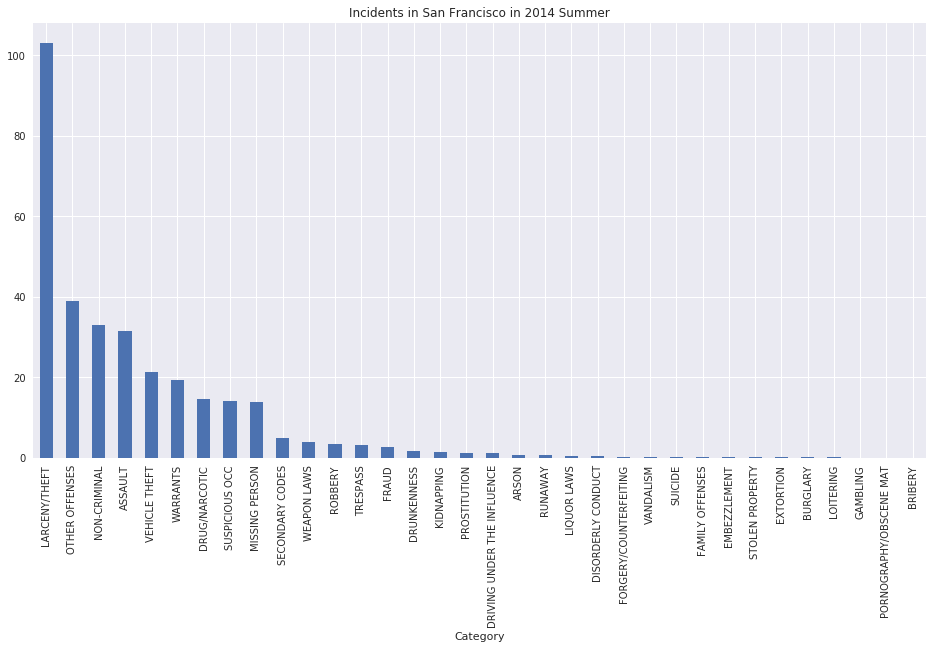

In [28]:
table_1 = by_date1.mean().sort_values(ascending=False)
fig, ax = plt.subplots(1, 1, figsize=(16, 8), sharex=True, sharey=True)
table_1.plot(kind='bar',title='Incidents in San Francisco in 2014 Summer',label='Incidents', linewidth=2)
plt.show()

**Incidents by Category in Seatle**

About the criminal incidents in the city of Seattle we can say that the most common are the next: 
* CAR PROWL          
* OTHER PROPERTY     
* BURGLARY           
* VEHICLE THEFT      
* PROPERTY DAMAGE    

In [31]:
namefile_2 = "../input/datainput2/seattle_incidents_summer_2014.csv"
analysis_2 = pd.read_csv(namefile_2,  sep=',', low_memory=False)
try:   
    ind = pd.DatetimeIndex(analysis_2['Date Reported'])
    analysis_2['Date Reported'] = ind.date.astype('datetime64')
    by_date2 = analysis_2.sort_values(by=('Summarized Offense Description'), ascending=False).pivot_table(values = 'RMS CDW ID', aggfunc='count',index = 'Date Reported',  columns=['Summarized Offense Description'],)
    cols= by_date2.columns
    for col in range(len(cols)):
        by_date2[cols[col]] = np.int16( by_date2[cols[col]])
except Exception as exc:
    print("Excepcion: {0}".format(exc))
by_date2.head()


Summarized Offense Description,ANIMAL COMPLAINT,ASSAULT,BIAS INCIDENT,BIKE THEFT,BURGLARY,BURGLARY-SECURE PARKING-RES,CAR PROWL,COUNTERFEIT,DISORDERLY CONDUCT,DISPUTE,...,STOLEN PROPERTY,THEFT OF SERVICES,THREATS,TRAFFIC,TRESPASS,VEHICLE THEFT,VIOLATION OF COURT ORDER,WARRANT ARREST,WEAPON,[INC - CASE DC USE ONLY]
Date Reported,,,,,,,,,,,,,,,,,,,,,
2014-06-01,4,22,2,0,20,0,40,2,0,2,...,6,2,20,2,0,15,2,6,0,1
2014-06-02,4,11,0,4,41,4,70,2,0,2,...,6,0,14,5,10,24,0,24,2,0
2014-06-03,0,19,0,9,36,8,72,4,0,2,...,4,1,8,0,8,23,2,9,4,0
2014-06-04,2,30,0,6,50,2,48,3,0,4,...,8,2,12,8,8,35,2,15,0,0
2014-06-05,0,19,0,6,30,4,71,2,0,1,...,8,0,17,3,6,45,2,20,2,0


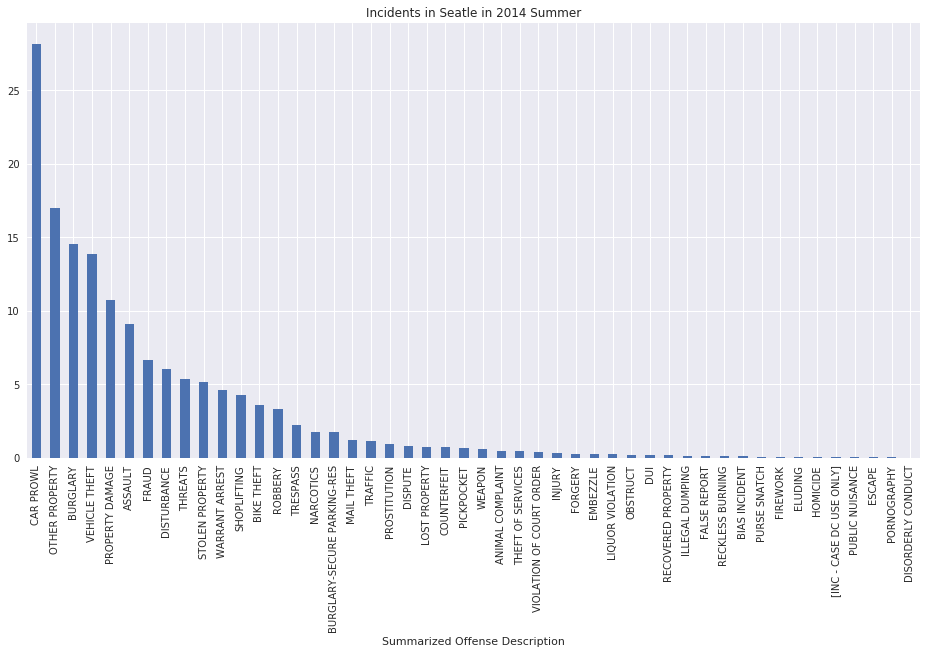

In [36]:
table_2 = by_date2.mean().sort_values(ascending=False)
color_cycle = plt.rcParams['axes.prop_cycle']
fig, ax = plt.subplots(1, 1, figsize=(16, 8), sharex=True, sharey=True)
table_2.plot(kind='bar',title='Incidents in Seatle in 2014 Summer',label='Incidents', linewidth=2)
plt.show()

**Analysis about how do incidents vary by time of day for either city**

It can be checked that they are two slot of time when the incidents are highers, between [15-20h] and [0-2h] and the most common incidents in this slot of time are Assaults and Burglaries.

In [120]:
import sys
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import time

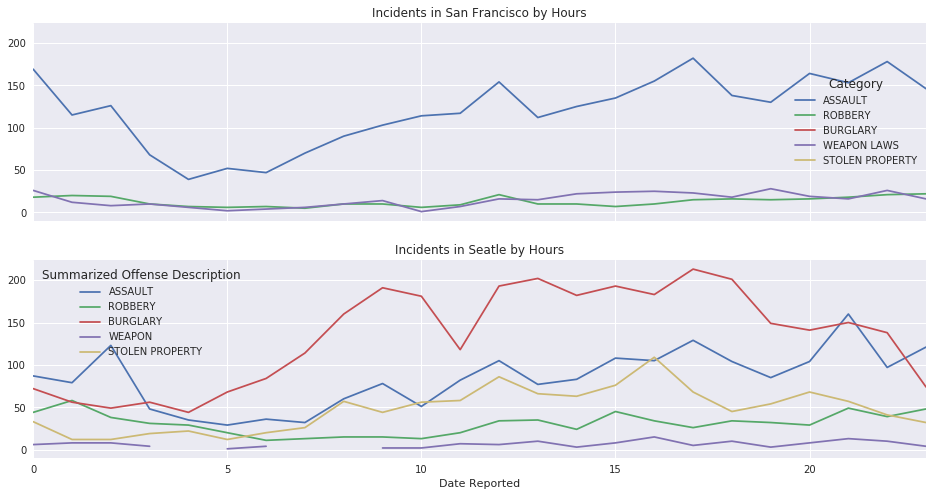

In [121]:
try:   
    namefile_1 = "../input/datainput1/sanfrancisco_incidents_summer_2014.csv"
    analysis_1 = pd.read_csv(namefile_1,  sep=',')
    ind1 = pd.DatetimeIndex(analysis_1.Time)
    analysis_1.Time = ind1.hour
    namefile_2 = "../input/datainput2/seattle_incidents_summer_2014.csv"
    analysis_2 = pd.read_csv(namefile_2,  sep=',', low_memory=False)
    ind2 = pd.DatetimeIndex(analysis_2['Date Reported'])
    analysis_2['Date Reported'] = ind2.hour    
except Exception as exc:
    print("Excepcion: {0}".format(exc))
by_day1 = analysis_1.pivot_table(values = 'IncidntNum', aggfunc='count',index = 'Time',  columns=['Category'],)
table_1 = by_day1.iloc[:,[1,23,3,33,26]] 
by_day2 = analysis_2.pivot_table(values = 'RMS CDW ID', aggfunc='count',index = 'Date Reported',  columns=['Summarized Offense Description'],)
table_2 = by_day2.iloc[:,[1,36,4,46,38]]
try:    
    color_cycle = plt.rcParams['axes.prop_cycle']
    fig, ax = plt.subplots(2, 1, figsize=(16, 8), sharex=True, sharey=True)
    table_1.iloc[:, :5].plot(ax=ax[0],title='Incidents in San Francisco by Hours');
    table_2.iloc[:, :5].plot(ax=ax[1],title='Incidents in Seatle by Hours');
    fig.savefig('figs/Question1.png', bbox_inches='tight')    
except Exception as exception1:
    print("Graphical plot exception: {0}".format(exception1))

In [122]:
table_2.sort_values(by=['ASSAULT','BURGLARY','ROBBERY','WEAPON','STOLEN PROPERTY'],ascending=False).head()

Summarized Offense Description,ASSAULT,ROBBERY,BURGLARY,WEAPON,STOLEN PROPERTY
Date Reported,,,,,
21,160.0,49.0,150.0,13.0,57.0
17,129.0,26.0,213.0,5.0,68.0
2,123.0,38.0,49.0,8.0,12.0
23,121.0,48.0,74.0,4.0,32.0
15,108.0,45.0,193.0,8.0,76.0


In [123]:
table_1.sort_values(by=['ASSAULT','BURGLARY','ROBBERY','WEAPON LAWS','STOLEN PROPERTY'],ascending=False).head()

Category,ASSAULT,ROBBERY,BURGLARY,WEAPON LAWS,STOLEN PROPERTY
Time,,,,,
17,182.0,15.0,NaN,23.0,NaN
22,178.0,21.0,NaN,26.0,NaN
0,169.0,18.0,NaN,26.0,NaN
20,164.0,16.0,NaN,19.0,NaN
16,155.0,10.0,NaN,25.0,NaN


**Analysis about how the incidents are most common in the evening**

In [117]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [118]:
def convert_to_array(table,incident):
    col = 0
    array = [0, 1, 2, 3, 4]
    for index in [0, 1, 2, 3, 4]:
        array[col] = table.iloc[index,incident]
        col = col + 1
    return array

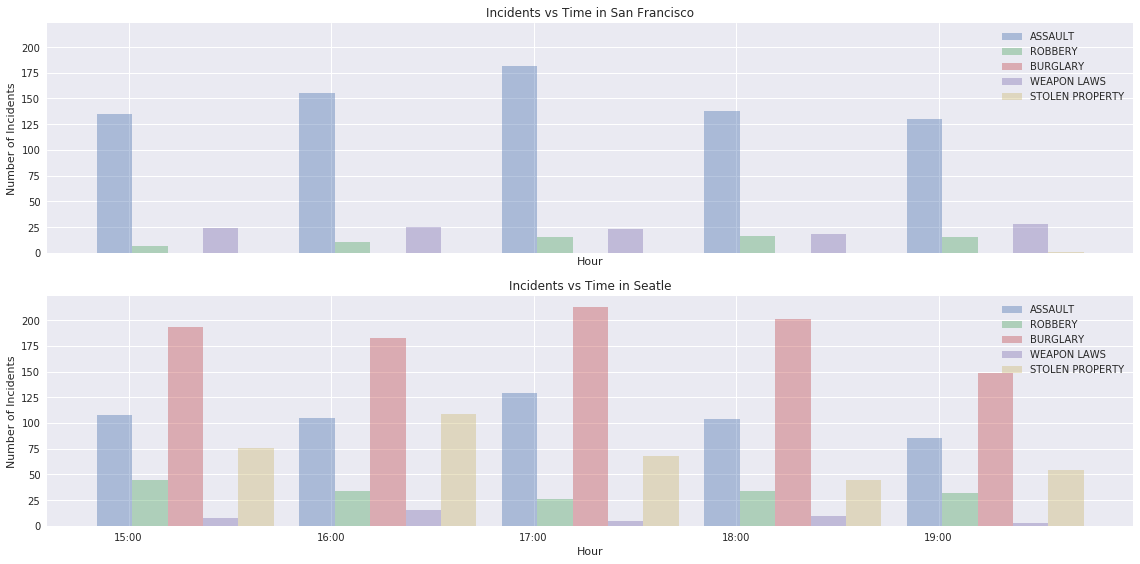

In [119]:

try:   
    namefile_1 = "../input/datainput1/sanfrancisco_incidents_summer_2014.csv"
    analysis_1 = pd.read_csv(namefile_1,  sep=',')
    ind1 = pd.DatetimeIndex(analysis_1.Time)
    analysis_1.Time = ind1.hour
    namefile_2 = "../input/datainput2/seattle_incidents_summer_2014.csv"
    analysis_2 = pd.read_csv(namefile_2,  sep=',', low_memory=False)
    ind2 = pd.DatetimeIndex(analysis_2['Date Reported'])
    analysis_2['Date Reported'] = ind2.hour 
except Exception as exc:
    print("Excepcion: {0}".format(exc))

by_day1 = analysis_1.pivot_table(values = 'IncidntNum', aggfunc='count',index = 'Time',  columns=['Category'],)
cols= by_day1.columns
for col in range(len(cols)):
    by_day1[cols[col]] = np.int16(by_day1[cols[col]])
table_1 = by_day1.iloc[15:20,[1,23,3,33,26]] 

by_day2 = analysis_2.pivot_table(values = 'RMS CDW ID', aggfunc='count',index = 'Date Reported',  columns=['Summarized Offense Description'],)
cols= by_day2.columns
for col in range(len(cols)):
    by_day2[cols[col]] = np.int16(by_day2[cols[col]])

table_2 = by_day2.iloc[15:20,[1,36,4,46,38]] 

color_cycle = plt.rcParams['axes.prop_cycle']
fig, ax = plt.subplots(2, 1, figsize=(16, 8), sharex=True, sharey=True)
n_groups = 5
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax[0].bar(index, convert_to_array(table_1,0),bar_width/2,alpha=opacity,label=table_1.columns[0])
rects2 = ax[0].bar(index + bar_width/2, convert_to_array(table_1,1),bar_width/2,alpha=opacity,label=table_1.columns[1])  
rects3 = ax[0].bar(index + bar_width, convert_to_array(table_1,2),bar_width/2,alpha=opacity,label=table_1.columns[2]) 
rects4 = ax[0].bar(index + bar_width + bar_width/2, convert_to_array(table_1,3),bar_width/2,alpha=opacity,label=table_1.columns[3]) 
rects5 = ax[0].bar(index + 2 * bar_width, convert_to_array(table_1,4),bar_width/2,alpha=opacity,label=table_1.columns[4]) 

ax[0].set_xlabel('Hour')
ax[0].set_ylabel('Number of Incidents')
ax[0].set_title('Incidents vs Time in San Francisco')
ax[0].set_xticks(index + bar_width / 5)
ax[0].set_xticklabels(('15:00', '16:00', '17:00', '18:00', '19:00'))
ax[0].legend()


rects1 = ax[1].bar(index, convert_to_array(table_2,0),bar_width/2,alpha=opacity,label=table_1.columns[0])
rects2 = ax[1].bar(index + bar_width/2,convert_to_array(table_2,1),bar_width/2,alpha=opacity,label=table_1.columns[1])  
rects3 = ax[1].bar(index + bar_width, convert_to_array(table_2,2),bar_width/2,alpha=opacity,label=table_1.columns[2]) 
rects4 = ax[1].bar(index + bar_width + bar_width/2,convert_to_array(table_2,3),bar_width/2,alpha=opacity,label=table_1.columns[3]) 
rects5 = ax[1].bar(index + 2 * bar_width, convert_to_array(table_2,4),bar_width/2,alpha=opacity,label=table_1.columns[4]) 

ax[1].set_xlabel('Hour')
ax[1].set_ylabel('Number of Incidents')
ax[1].set_title('Incidents vs Time in Seatle')
ax[1].set_xticks(index + bar_width / 5)
ax[1].set_xticklabels(('15:00', '16:00', '17:00', '18:00', '19:00'))
ax[1].legend()



fig.tight_layout()
plt.show()
  

fig.savefig('figs/Question2.png', bbox_inches='tight')
    



**During what periods of the day are robberies most common**

In [81]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
import numpy as np
import pandas as pd 
import sys

In [82]:
def convert_to_array_2(table,incident):
    try:
        col = 0
        new_range = range(24)
        array = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
        for index in new_range:
            array[col] = np.int16(table.iloc[index,incident])
            col = col + 1
        return array
    except Exception as exception2:
        print("Exception: {0}".format(exception2))


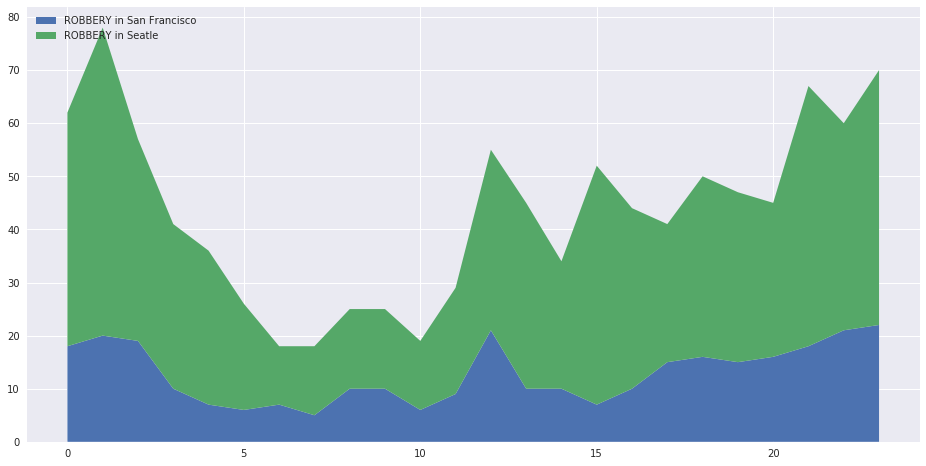

In [114]:
try:   
    namefile_1 = "../input/datainput1/sanfrancisco_incidents_summer_2014.csv"
    analysis_1 = pd.read_csv(namefile_1,  sep=',')
    ind1 = pd.DatetimeIndex(analysis_1.Time)
    analysis_1.Time = ind1.hour
    
    namefile_2 = "../input/datainput2/seattle_incidents_summer_2014.csv"
    analysis_2 = pd.read_csv(namefile_2,  sep=',', low_memory=False)
    ind2 = pd.DatetimeIndex(analysis_2['Date Reported'])
    #analysis_2['Date Reported'] = ind2.hour
    analysis_2['Time'] = ind2.hour
except Exception as exc:
    print("Excepcion: {0}".format(exc))
by_day1 = analysis_1.pivot_table(values = 'IncidntNum', aggfunc='count',index = 'Time',  columns=['Category'],)
cols= by_day1.columns
for col in range(len(cols)):
    by_day1[cols[col]] = np.int16(by_day1[cols[col]])
table_1 = by_day1.iloc[:,[1,23,3,33,26]] 
by_day2 = analysis_2.pivot_table(values = 'RMS CDW ID', aggfunc='count',index = 'Time',  columns=['Summarized Offense Description'],)
cols= by_day2.columns
for col in range(len(cols)):
    by_day2[cols[col]] = np.int16(by_day2[cols[col]])
table_2 = by_day2.iloc[:,[1,36,4,46,38]] 
y1 = convert_to_array_2(table_1,1)
y2 = convert_to_array_2(table_2,1)
x = table_1.index
labels = ["ROBBERY in San Francisco ", "ROBBERY in Seatle"]
color_cycle = plt.rcParams['axes.prop_cycle']
fig, ax = plt.subplots(1, 1, figsize=(16, 8), sharex=True, sharey=True)
ax.stackplot(x, y1, y2, labels=labels)
ax.legend(loc=2)
plt.show()

fig.savefig('figs/Question3.png', bbox_inches='tight')



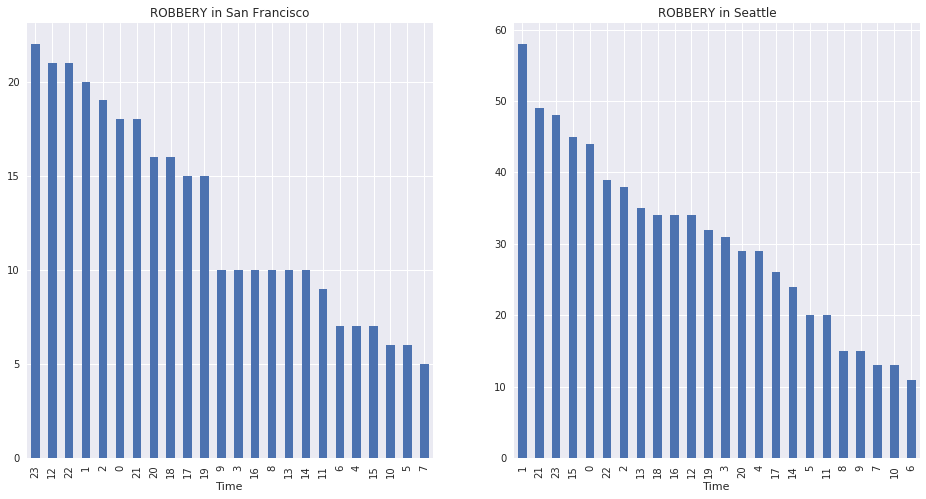

In [115]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
plt.subplot(121)
table_1['ROBBERY'].sort_values(ascending=False).plot(kind='bar',title='ROBBERY in San Francisco')
plt.subplot(122)
table_2['ROBBERY'].sort_values(ascending=False).plot(kind='bar',title='ROBBERY in Seattle')

The graphics results showing how the robberies in both cities are produced by the night

**How do incidents vary month to month in the Summer 2014 dataset**

In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import time
import sys

In [38]:
NAME_OF_FILE1 = "../input/datainput1/sanfrancisco_incidents_summer_2014.csv"
NAME_OF_FILE2 = "../input/datainput2/seattle_incidents_summer_2014.csv"

In [39]:
def graphics_trends(table_1,table_2,title_1,title_2,nameoffile):
    try:    
        color_cycle = plt.rcParams['axes.prop_cycle']
        fig, ax = plt.subplots(2, 1, figsize=(16, 8), sharex=True, sharey=True)
        table_1.iloc[:, :5].plot(ax=ax[0],title=title_1);
        table_2.iloc[:, :5].plot(ax=ax[1],title=title_2);
        fig.savefig(nameoffile, bbox_inches='tight')    
    
    except Exception as exception1:
        print("Graphical plot exception: {0}".format(exception1))
    
def read_data_analysis(namefile_1,namedataindex,nametimeindex):
    analysis_1 = pd.read_csv(namefile_1,  sep=',', low_memory=False)
    try:   
        ind = pd.DatetimeIndex(analysis_1[namedataindex])
        analysis_1[namedataindex] = ind.date.astype('datetime64')
        analysis_1[nametimeindex] = ind.hour
    except Exception as exc:
        print("Excepcion reading data: {0} {1}".format(exc,namedataindex))
    finally:
        return analysis_1

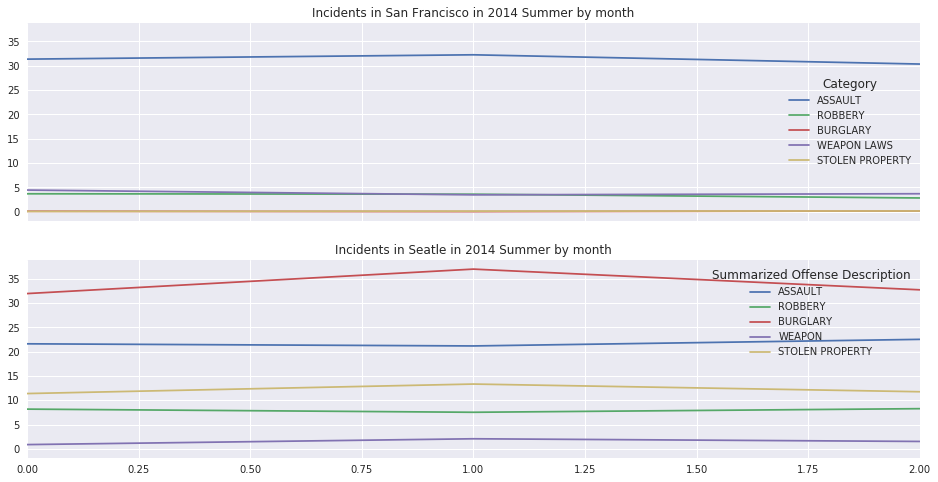

In [116]:
analysis_1 = read_data_analysis(NAME_OF_FILE1,'Date','Time')
by_date1 = analysis_1.pivot_table(values = 'IncidntNum', aggfunc='count',index = 'Date',  columns=['Category'],)
cols= by_date1.columns
for col in range(len(cols)):
    by_date1[cols[col]] = np.int16( by_date1[cols[col]])
analysis_2 = read_data_analysis(NAME_OF_FILE2,'Date Reported','Time')
by_date2 = analysis_2.pivot_table(values = 'RMS CDW ID', aggfunc='count',index = 'Date Reported',  columns=['Summarized Offense Description'],)
cols= by_date2.columns
for col in range(len(cols)):
    by_date2[cols[col]] = np.int16( by_date2[cols[col]])
    
by_date2_final = by_date2['06-2014':'09-2014']
by_date1_final = by_date1['06-2014':'09-2014']

try:
    colsnames = ['06-2014','07-2014','08-2014']
    table_1 = pd.DataFrame(columns=by_date1_final.columns)
    table_2 = pd.DataFrame(columns=by_date2_final.columns)
    for index in range(3):
        record = by_date1_final[colsnames[index]]
        array=record.iloc[:,:].mean()
        table_1.loc[index,'ASSAULT'] = array['ASSAULT']
        table_1.loc[index,'BURGLARY'] = array['BURGLARY']
        table_1.loc[index,'ROBBERY'] = array['ROBBERY']
        table_1.loc[index,'WEAPON LAWS'] = array['WEAPON LAWS']
        table_1.loc[index,'STOLEN PROPERTY'] = array['STOLEN PROPERTY']
        
        record = by_date2_final[colsnames[index]]
        array=record.iloc[:,:].mean()
        table_2.loc[index,'ASSAULT'] = array['ASSAULT']
        table_2.loc[index,'BURGLARY'] = array['BURGLARY']
        table_2.loc[index,'ROBBERY'] = array['ROBBERY']
        table_2.loc[index,'WEAPON'] = array['WEAPON']
        table_2.loc[index,'STOLEN PROPERTY'] = array['STOLEN PROPERTY']
   
except Exception as exception1:
    print("Exception: {0}".format(exception1))
    sys.exit(0)

graphics_trends(table_1.iloc[:,[1,23,3,33,26]],table_2.iloc[:,[1,36,4,46,38]],'Incidents in San Francisco in 2014 Summer by month',
                'Incidents in Seatle in 2014 Summer by month',
                'figs/Question5_1.png')



In [41]:
table_1.iloc[:,[1,23,3,33,26]].sort_values(by=['ASSAULT','BURGLARY','ROBBERY','WEAPON LAWS','STOLEN PROPERTY'],ascending=False).head()

Category,ASSAULT,ROBBERY,BURGLARY,WEAPON LAWS,STOLEN PROPERTY
1,32.2581,3.58065,0,3.45161,0.0967742
0,31.3667,3.66667,0.0666667,4.43333,0.0333333
2,30.3548,2.80645,0.129032,3.67742,0.129032


In [42]:
table_2.iloc[:,[1,36,4,46,38]].sort_values(by=['ASSAULT','BURGLARY','ROBBERY','WEAPON','STOLEN PROPERTY'],ascending=False).head()

Summarized Offense Description,ASSAULT,ROBBERY,BURGLARY,WEAPON,STOLEN PROPERTY
2,22.5161,8.25806,32.7097,1.51613,11.7419
0,21.6,8.16667,31.9333,0.866667,11.3667
1,21.1613,7.51613,36.9677,2.06452,13.3226


In [43]:
def convert_to_array_3(table,incident):
    col = 0
    array = [0, 1, 2]
    for index in [0, 1, 2]:
        array[col] = table.iloc[index,incident]
        col = col + 1
    return array

In [ ]:
color_cycle = plt.rcParams['axes.prop_cycle']
fig, ax = plt.subplots(2, 1, figsize=(16, 8), sharex=True, sharey=True)
n_groups = 3
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}


rects1 = ax[0].bar(index, convert_to_array_3(table_1.iloc[:,[1,23,3,33,26]],0),bar_width/2,alpha=opacity,label=table_1.columns[0])
rects2 = ax[0].bar(index + bar_width/2, convert_to_array_3(table_1.iloc[:,[1,23,3,33,26]],1),bar_width/2,alpha=opacity,label=table_1.columns[1])  
rects3 = ax[0].bar(index + bar_width, convert_to_array_3(table_1.iloc[:,[1,23,3,33,26]],2),bar_width/2,alpha=opacity,label=table_1.columns[2]) 
rects4 = ax[0].bar(index + 3*bar_width/2, convert_to_array_3(table_1.iloc[:,[1,23,3,33,26]],3),bar_width/2,alpha=opacity,label=table_1.columns[3])  
rects5 = ax[0].bar(index + 2*bar_width, convert_to_array_3(table_1.iloc[:,[1,23,3,33,26]],4),bar_width/2,alpha=opacity,label=table_1.columns[4]) 

ax[0].set_xlabel('Month')
ax[0].set_ylabel('Number of Incidents')
ax[0].set_title('Incidents vs Time in San Francisco')
ax[0].set_xticks(index + bar_width / 5)
ax[0].set_xticklabels(('June', 'July', 'August'))
ax[0].legend()

rects1 = ax[1].bar(index, convert_to_array_3(table_2.iloc[:,[1,36,4,46,38]],0),bar_width/2,alpha=opacity,label=table_2.columns[0])
rects2 = ax[1].bar(index + bar_width/2,convert_to_array_3(table_2.iloc[:,[1,36,4,46,38]],1),bar_width/2,alpha=opacity,label=table_2.columns[1])  
rects3 = ax[1].bar(index + bar_width, convert_to_array_3(table_2.iloc[:,[1,36,4,46,38]],2),bar_width/2,alpha=opacity,label=table_2.columns[2]) 
rects4 = ax[1].bar(index + 3*bar_width/2, convert_to_array_3(table_2.iloc[:,[1,36,4,46,38]],3),bar_width/2,alpha=opacity,label=table_2.columns[3])  
rects5 = ax[1].bar(index + 2*bar_width, convert_to_array_3(table_2.iloc[:,[1,36,4,46,38]],4),bar_width/2,alpha=opacity,label=table_2.columns[4]) 

ax[1].set_xlabel('Month')
ax[1].set_ylabel('Number of Incidents')
ax[1].set_title('Incidents vs Time in Seatle')
ax[1].set_xticks(index + bar_width / 3)
ax[1].set_xticklabels(('June', 'July', 'August'))
ax[1].legend()



fig.tight_layout()
plt.show()


In Seattle is August the worst month and in San Francisco is July the worst month 

**How do incidents vary day to day in the Summer 2014 dataset**

In [48]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import time

In [73]:
def convert_to_array_4(table,incident):
    try:
        col = 0
        new_range = range(len(table.index))
        array = list(range(len(table.index)))
        for index in new_range:
            array[col] = np.int16(table.iloc[index,incident])
            col = col + 1
        return array
    except Exception as exception2:
        print("Exception Conversion Data: {0}".format(exception2))

def stack_graphics(table1,table2):
    y1 = convert_to_array_4(table1,0)
    y2 = convert_to_array_4(table1,1)
    y3 = convert_to_array_4(table1,2)
    y4 = convert_to_array_4(table1,3)
    y5 = convert_to_array_4(table1,4)
    x = table1.index
    labels = table1.columns
    color_cycle = plt.rcParams['axes.prop_cycle']
    fig, ax = plt.subplots(2, 1, figsize=(16, 8), sharex=True, sharey=True)
    ax[0].stackplot(x, y1, y2, y3, y4, y5, labels=labels)
    ax[0].legend(loc=2)
    
    y1 = convert_to_array_4(table2,0)
    y2 = convert_to_array_4(table2,1)
    y3 = convert_to_array_4(table2,2)
    y4 = convert_to_array_4(table2,3)
    y5 = convert_to_array_4(table2,4)
    x = table2.index
    labels = table2.columns
    ax[1].stackplot(x, y1, y2, y3, y4, y5, labels=labels)
    ax[1].legend(loc=2)
    
    plt.show()
    

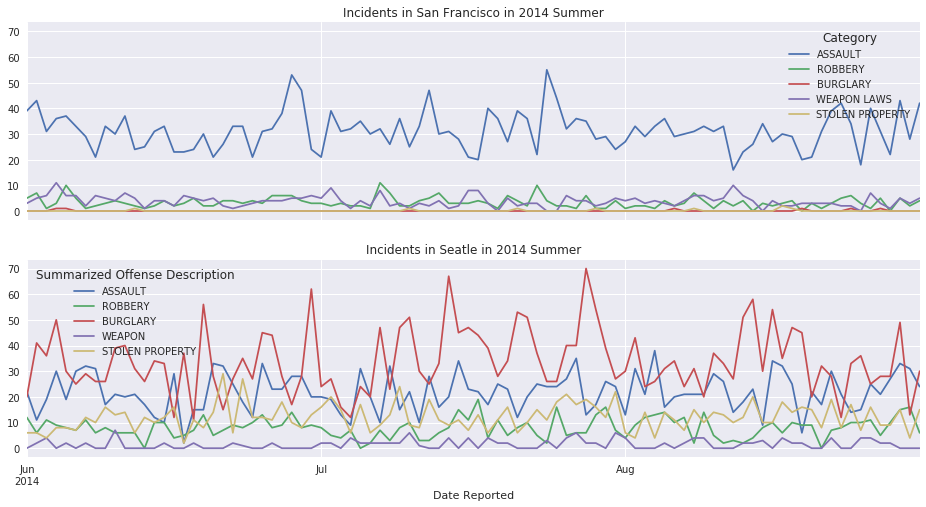

In [76]:
namefile_1 = "../input/datainput1/sanfrancisco_incidents_summer_2014.csv"
analysis_1 = pd.read_csv(namefile_1,  sep=',')
try:   
    ind = pd.DatetimeIndex(analysis_1.Date)
    analysis_1['Date'] = ind.date.astype('datetime64')
    analysis_1['Time'] = ind.hour
except Exception as exc:
    print("Excepcion: {0}".format(exc))

by_date1 = analysis_1.pivot_table(values = 'IncidntNum', aggfunc='count',index = 'Date',  columns=['Category'],)
cols= by_date1.columns
for col in range(len(cols)):
    by_date1[cols[col]] = np.int16( by_date1[cols[col]])
namefile_2 = "../input/datainput2/seattle_incidents_summer_2014.csv"
analysis_2 = pd.read_csv(namefile_2,  sep=',',low_memory=False)
try:   
    ind = pd.DatetimeIndex(analysis_2['Date Reported'])
    analysis_2['Date Reported'] = ind.date.astype('datetime64')
except Exception as exc:
    print("Excepcion: {0}".format(exc))

by_date2 = analysis_2.pivot_table(values = 'RMS CDW ID', aggfunc='count',index = 'Date Reported',  columns=['Summarized Offense Description'],)
cols= by_date2.columns
for col in range(len(cols)):
    by_date2[cols[col]] = np.int16( by_date2[cols[col]])
    
by_date2_final = by_date2['06-2014':'08-2014']
by_date1_final = by_date1['06-2014':'08-2014']

try:
    table_1 = by_date1_final.iloc[:,[1,23,3,33,26]] 
    table_2 = by_date2_final.iloc[:,[1,36,4,46,38]]    
except Exception as exception1:
    print("Exception: {0}".format(exception1))

try:    
    color_cycle = plt.rcParams['axes.prop_cycle']
    fig, ax = plt.subplots(2, 1, figsize=(16, 8), sharex=True, sharey=True)
    table_1.iloc[:, :5].plot(ax=ax[0],title='Incidents in San Francisco in 2014 Summer');
    table_2.iloc[:, :5].plot(ax=ax[1],title='Incidents in Seatle in 2014 Summer');
    fig.savefig('figs/Question5.png', bbox_inches='tight')    
    
except Exception as exception1:
    print("Graphical plot exception: {0}".format(exception1))

    

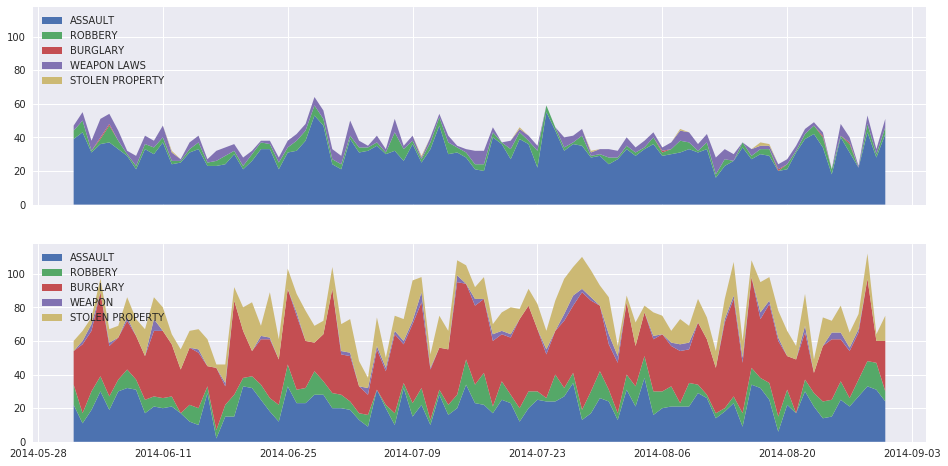

In [78]:
stack_graphics(table_1.iloc[:, :5],table_2.iloc[:, :5])